In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [2]:
df = pd.read_csv('df.csv')

In [3]:
features = df.loc[:, 'budget':'Western']

In [4]:
target = df.loc[:,'proportion']

In [5]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.4351441418961287

In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [8]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999939473519674

In [9]:
gbm.score(X_val, y_val)

0.9471381642878067

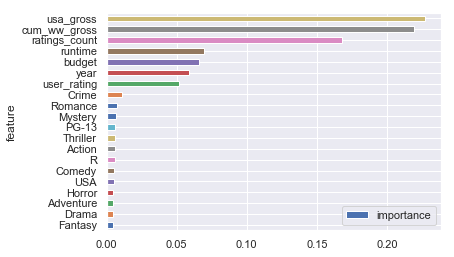

In [10]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(20).plot(x='feature',y='importance',kind='barh')


In [11]:
RMSE(gbm.predict(X_train),y_train)

0.0004865655507752428

In [12]:
RMSE(gbm.predict(X_val),y_val)

0.04541389511510066

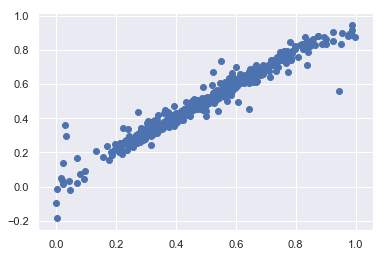

In [13]:
y_pred = gbm.predict(X_val)

plt.scatter(y_val, y_pred)

In [48]:
from sklearn import cross_validation, metrics

cv_score = cross_validation.cross_val_score(gbm, X_train, y_train, cv=5)
cv_score

TypeError: cross_val_score() got an unexpected keyword argument 'random_state'

In [15]:
cv_score = cross_validation.cross_val_score(gbm, X_val, y_val, cv=5)
cv_score

array([0.88427209, 0.81305473, 0.88389435, 0.9135485 , 0.899684  ])

In [16]:
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], axis=0)
X_train.shape

(1945, 66)

In [17]:
X_test.shape

(649, 66)

In [18]:
y_train = pd.concat([y_train, y_val], axis=0)
y_train.shape

(1945,)

In [19]:
cv_score = cross_validation.cross_val_score(gbm, X_train, y_train, cv=5)
cv_score

array([0.93258787, 0.97047148, 0.95427324, 0.94439624, 0.95112839])

In [20]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999823392839678

In [21]:
#need to test!!!

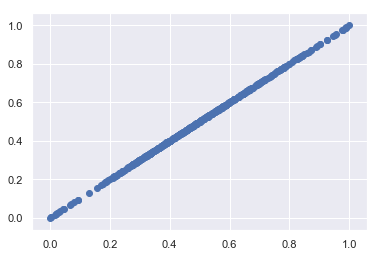

In [22]:
y_pred = gbm.predict(X_val)

plt.scatter(y_val, y_pred)

In [23]:
df.columns

Index(['title', 'budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'proportion'],
      dtype='object')

In [24]:
features = df.loc[:, 'budget':'year']

In [25]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [27]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999955768307783

In [28]:
gbm.score(X_val,y_val)

0.9531419458943794

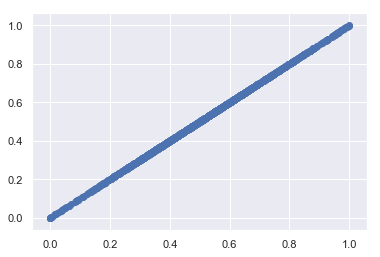

In [29]:
plt.scatter(gbm.predict(X_train),y_train)

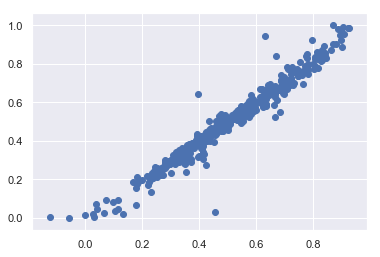

In [30]:
plt.scatter(gbm.predict(X_val),y_val)

In [64]:
features = df.loc[:, ['Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [65]:
df.columns

Index(['title', 'budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'proportion'],
      dtype='object')

In [66]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.5104979071167425

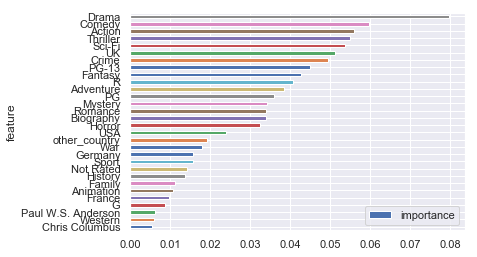

In [67]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(30).plot(x='feature',y='importance',kind='barh')


In [70]:
features = df.loc[:, ['France', 'Germany', 'UK', 'USA', 'other_country', 'G', 'PG', 'PG-13', 'R', 'Not Rated', 'Chris Columbus', 'Paul W.S. Anderson',
       'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [71]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.46134986471635064

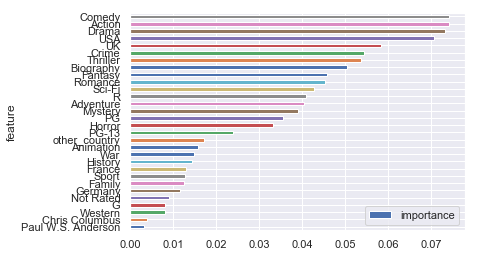

In [73]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(30).plot(x='feature',y='importance',kind='barh')


In [74]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year','France', 'Germany', 'UK', 'USA', 'other_country', 'G', 'PG', 'PG-13', 'R', 'Not Rated', 'Chris Columbus', 'Paul W.S. Anderson',
       'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [75]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999956369966843

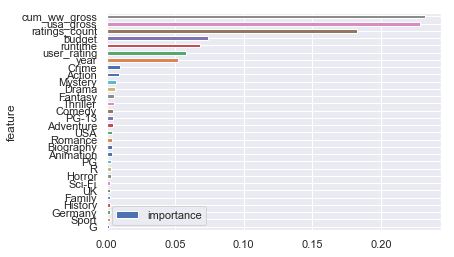

In [76]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(30).plot(x='feature',y='importance',kind='barh')


In [77]:
gbm.score(X_val, y_val)

0.9503768559136648

In [108]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year','France',  'USA', 'UK', 'other_country','PG', 'PG-13', 'R', 'Not Rated', 
       'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Fantasy', 
       'Horror', 'Mystery',
       'Romance',  'Thriller','Western']]

In [109]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999952323280454

In [110]:
gbm.score(X_val, y_val)

0.9525814897527236

In [117]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
    'user_rating', 'year','France',  'USA', 'UK', 'other_country','PG', 'PG-13', 'R', 'Not Rated', 
       'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Fantasy', 
       'Horror', 'Mystery',
       'Romance',  'Thriller','Western']]

In [118]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9993241560209739

In [119]:
gbm.score(X_val, y_val)

0.08022640099473854

In [125]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [126]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991774248282062

In [127]:
gbm.score(X_val, y_val)

0.11824906073135777

In [180]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Chris Columbus', 'Western','Sport','Action','Clint Eastwood','Ron Howard','Michael Bay','USA']]

In [181]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9990331567509859

In [182]:
gbm.score(X_val, y_val)

-0.015442796829829408

(array([  8.,  32.,  90., 303., 578., 320.,  98.,  20.,   8.,   1.]),
 array([-0.02359649, -0.01834787, -0.01309926, -0.00785064, -0.00260202,
         0.0026466 ,  0.00789522,  0.01314383,  0.01839245,  0.02364107,
         0.02888969]),
 <a list of 10 Patch objects>)

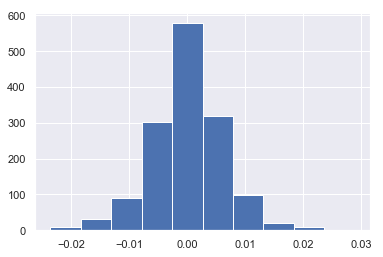

In [187]:
res = y_train-gbm.predict(X_train)
plt.hist(res)

(array([  2.,   5.,  15.,  40., 114., 174., 100.,  30.,   4.,   3.]),
 array([-0.83277127, -0.67611756, -0.51946386, -0.36281016, -0.20615645,
        -0.04950275,  0.10715095,  0.26380466,  0.42045836,  0.57711206,
         0.73376577]),
 <a list of 10 Patch objects>)

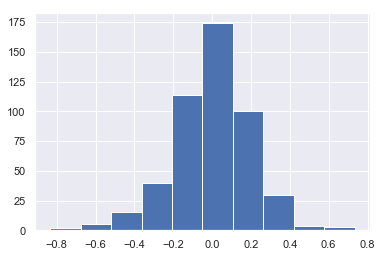

In [189]:
res = y_val-gbm.predict(X_val)
plt.hist(res)

In [156]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=800, max_features=25)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9020982873475802

In [157]:
rf.score(X_val, y_val)

0.32917039600833886

In [177]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Chris Columbus', 'Western','Sport','Action','Clint Eastwood','Ron Howard','Michael Bay','USA']]

In [178]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=800, max_features=5)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8979444493559067

In [179]:
rf.score(X_val, y_val)

0.2730580603539128

(array([  6.,  14.,  44., 118., 317., 468., 282., 139.,  51.,  19.]),
 array([-0.24205558, -0.19820201, -0.15434845, -0.11049488, -0.06664132,
        -0.02278775,  0.02106581,  0.06491938,  0.10877294,  0.15262651,
         0.19648008]),
 <a list of 10 Patch objects>)

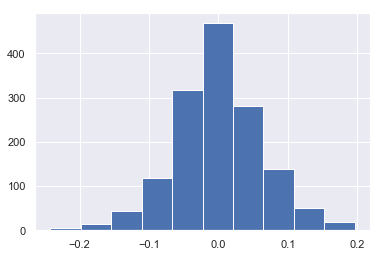

In [183]:
res = y_train-rf.predict(X_train)
plt.hist(res)

(array([  4.,  10.,  16.,  35.,  83., 155., 105.,  48.,  20.,  11.]),
 array([-0.58803889, -0.48305794, -0.37807699, -0.27309604, -0.16811509,
        -0.06313413,  0.04184682,  0.14682777,  0.25180872,  0.35678967,
         0.46177062]),
 <a list of 10 Patch objects>)

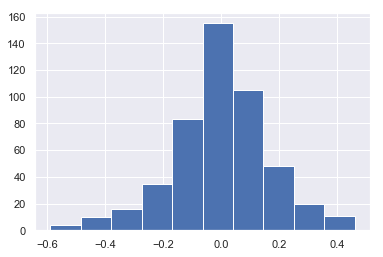

In [185]:
res = y_val-rf.predict(X_val)
plt.hist(res)

In [190]:
df.columns

Index(['title', 'budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'proportion'],
      dtype='object')

In [196]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [197]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=800, max_features=5)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9075753534325595

In [198]:
rf.score(X_val, y_val)

0.3796024447555958

In [199]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991902100009933

In [200]:
gbm.score(X_val,y_val)

0.36283087607316544